# Rossmann Pharmaceutical Data Exploratory Analysis

* Exploratory Data analysis is the lifeblood for every machine learnng project. It Helps to unravel the nature of the data and informs us how to go about modeling.

* In this section I explore the behavior of customers in the varios stores. My goal is to check how some measures such as promos and the opening of new stores affect purchasing behavior. 

**Data**
* Data Taken from: Rossmann Store Sales[https://www.kaggle.com/competitions/rossmann-store-sales/data]


**Import basic Libraries**

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get Working Directory
import os, sys
sys.path.append(os.path.abspath('..'))

In [3]:
import scripts.Eda as eda

**Load Data**

In [4]:
# Load and Preprocessing
data = eda.load_data('../data/processed_data.csv')

2025-01-05 23:55:27,576 - INFO - Loading data from file...
2025-01-05 23:55:28,931 - INFO - Data loaded with shape (1017209, 12)


In [5]:
# data preview
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
Date,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,c,a,1270.0,0
2013-01-02,1,3,5530,668,1,0,0,1,c,a,1270.0,0
2013-01-03,1,4,4327,578,1,0,0,1,c,a,1270.0,0
2013-01-04,1,5,4486,619,1,0,0,1,c,a,1270.0,0
2013-01-05,1,6,4997,635,1,0,0,1,c,a,1270.0,0


## 1. Descriptive Statistics 


Descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of structured data.

* In python descriptive statistics easliy accessed using `describe` methode

In [6]:
# Descriptive analysis for numerical data
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430020e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.705298e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00


In [7]:
# descriptive anaysis for Categorical data
data.describe(include=['object'])

,StateHoliday,StoreType,Assortment
count,1017209,1017209,1017209
unique,4,4,3
top,0,a,a
freq,986159,551627,537445


**Let's see Summary statistics**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  object 
 7   SchoolHoliday        1017209 non-null  int64  
 8   StoreType            1017209 non-null  object 
 9   Assortment           1017209 non-null  object 
 10  CompetitionDistance  1017209 non-null  float64
 11  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 100.9+ MB


## 2. Time Plot

**Time series plot for sales**

2025-01-05 23:55:29,964 - INFO - Plotting Sales over Time for specific Store...


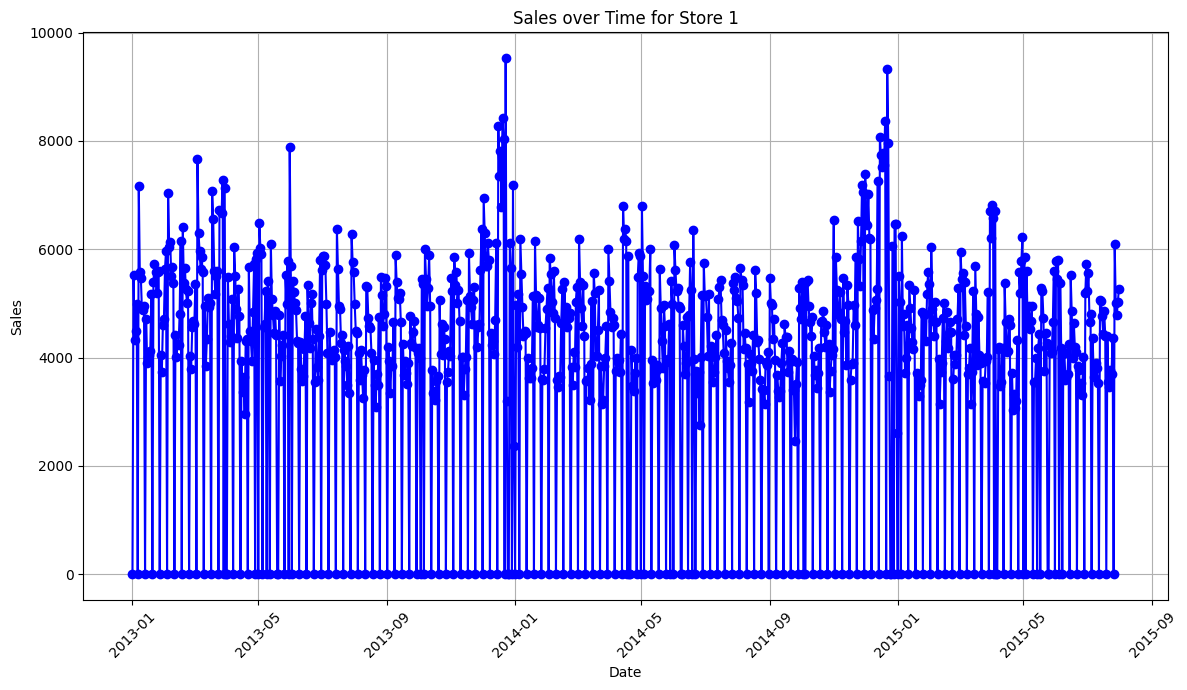

In [9]:
# Time series plot for sales on store 1
eda.plot_sales_over_time(data, 1)

2025-01-05 23:55:30,381 - INFO - Plotting Sales over Time for specific Store...


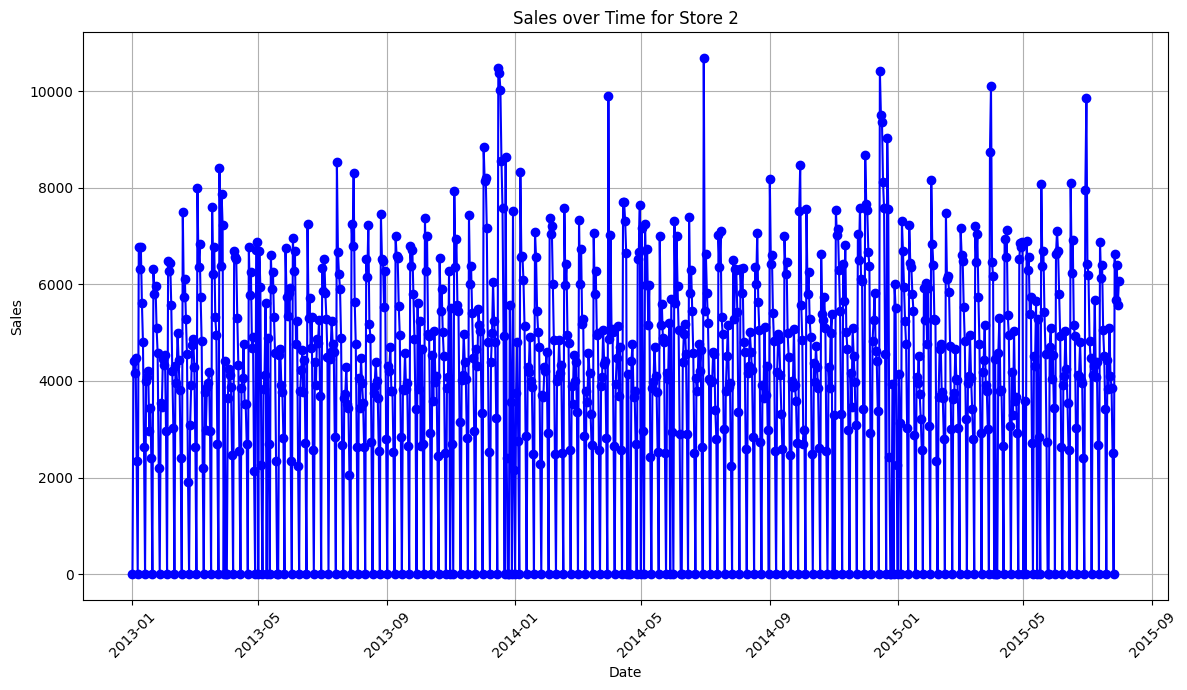

In [10]:
# Time series plot for sales on store 2
eda.plot_sales_over_time(data, 2)

2025-01-05 23:55:30,689 - INFO - Plotting Sales over Time...


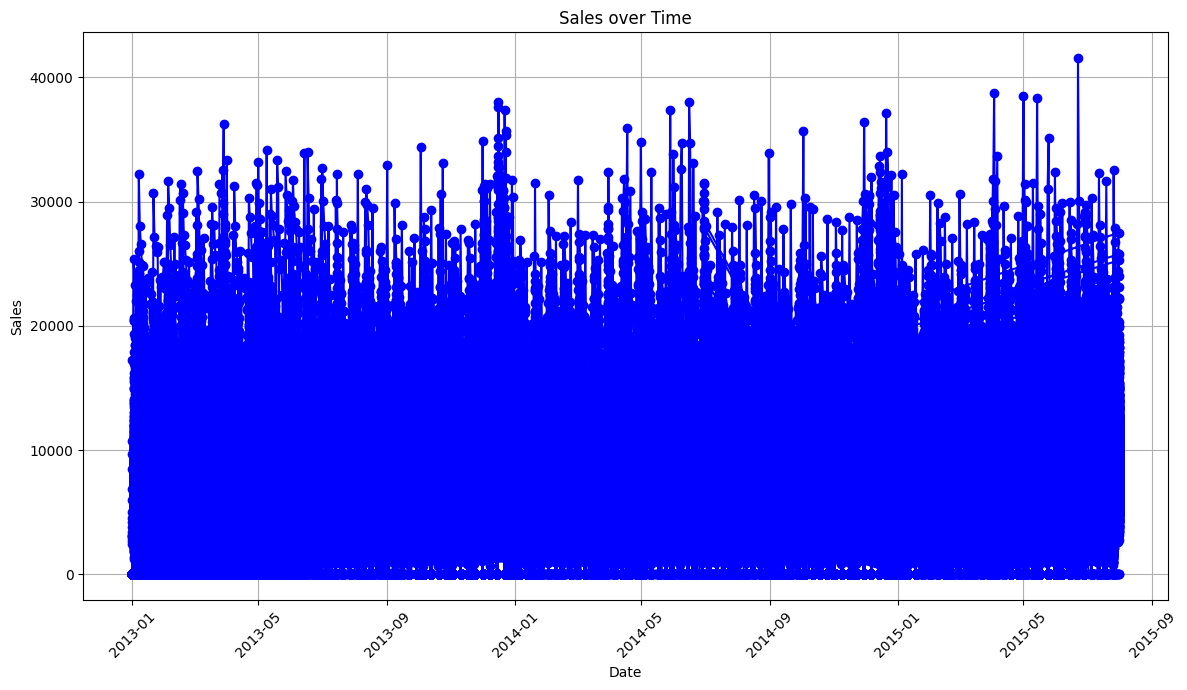

In [11]:
# Time series plot for sales on all store
eda.plot_sales_over_time_all_store(data)

**Insight**
* The pattern shows seasonality of the data in interval of 4 months

### Weekly Sales Plot 

2025-01-05 23:55:54,822 - INFO - Weekly Sales Plot...


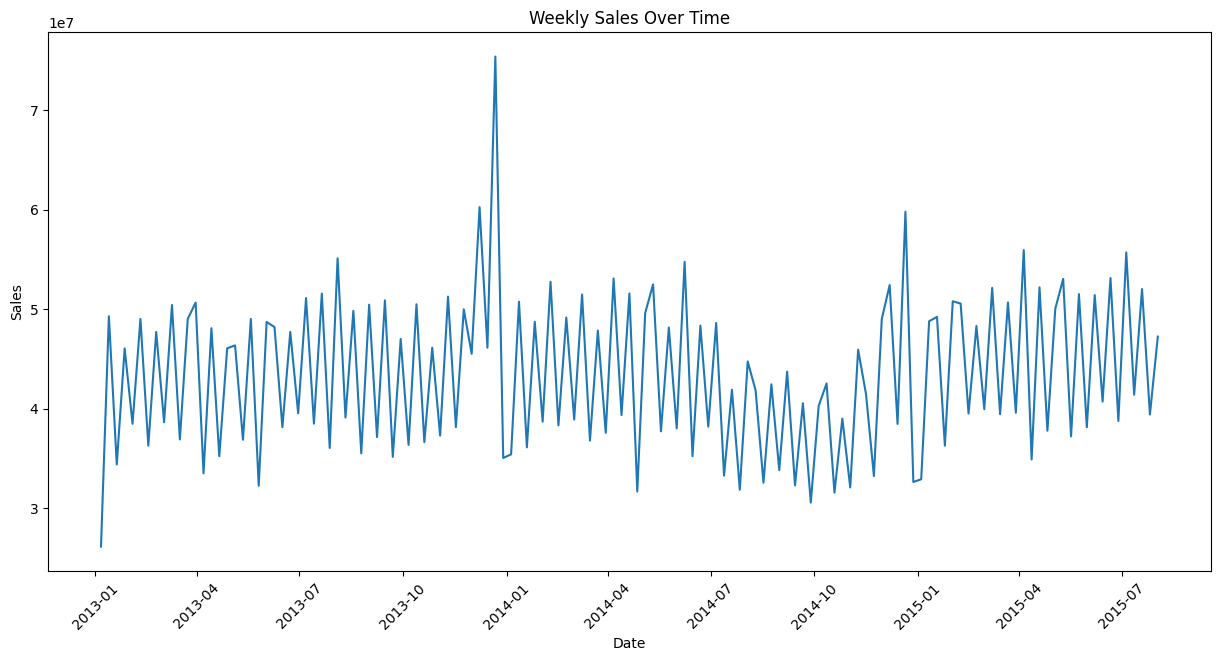

In [12]:
eda.weekly_sales_plot(data)

### Monthly Sales Plot

2025-01-05 23:55:55,658 - INFO - Monthly Sales Plot...


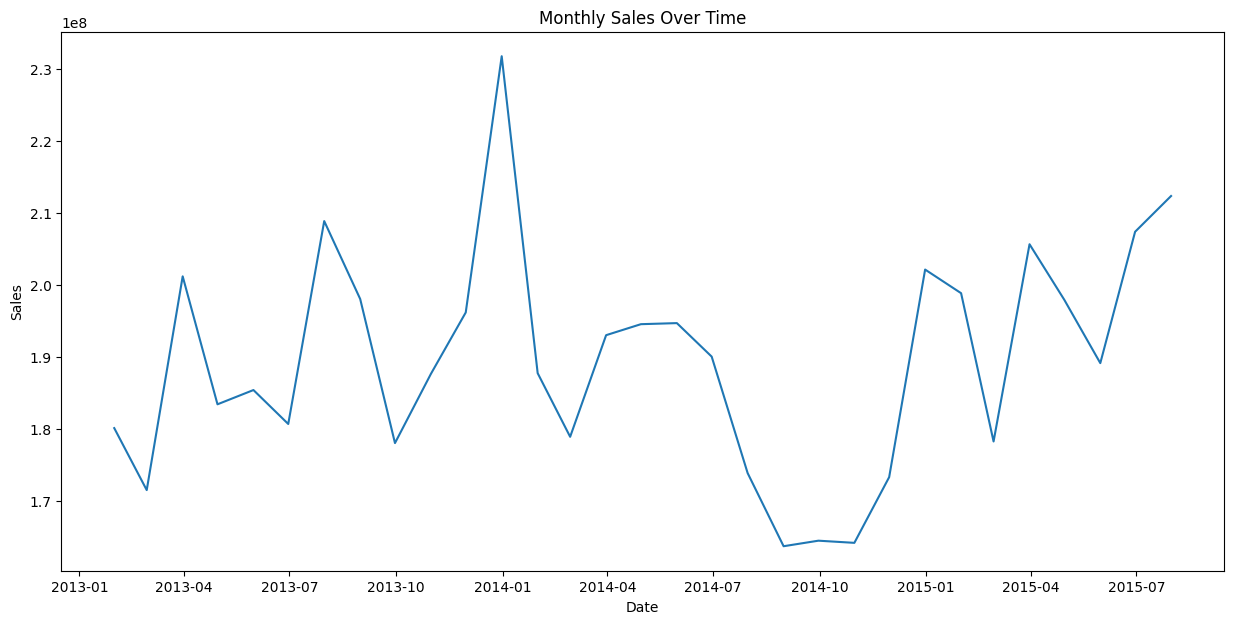

In [13]:
eda.monthly_sales_sales(data)

## 3. Seasonal Plot
* A seasonal plot is fundamentally a time plot where data are plotted against the individual “seasons” of the series they belong.
* Regarding Rossmann Pharmaceutical data, we usually have hourly data available, so there could be several seasonality: yearly, weekly, daily. 

### Seasonal Plot - Yearly Sales 

* Sales data plot grouped by year over months, this highlights yearly seasonality and can inform us about ascending/descending trends over the years.

2025-01-05 23:55:56,071 - INFO - Yearly Sales Plot...


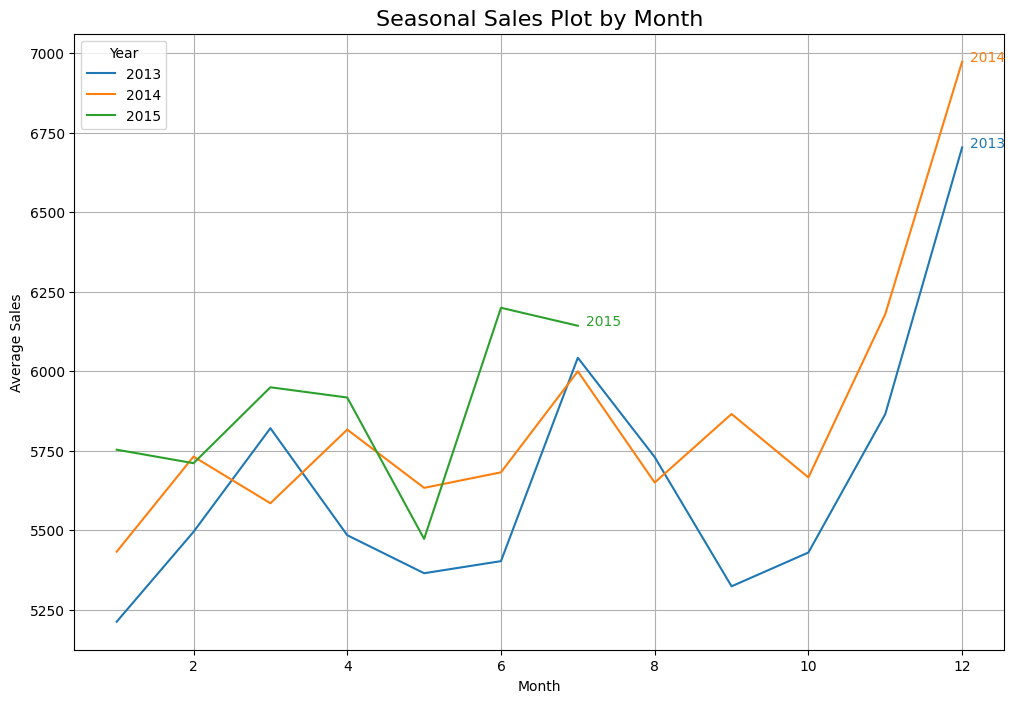

In [14]:
eda.plot_yearly_sales(data)

**Insight**
* This plot shows every year has actually a very predefined pattern: The seasonal sales data shows a clear trend of increased sales during December across all three years (2013, 2014, and 2015), indicating strong year-end demand, likely due to holiday shopping. While sales in January are consistently lower, they gradually rise through the year, with notable mid-year fluctuations. December 2014 stands out as the highest sales month overall, marked by a sharp increase from November. 

### Seasonal Plot - weekly Sales

2025-01-05 23:55:57,283 - INFO - Weekly Sales Plot Grouping by Month....


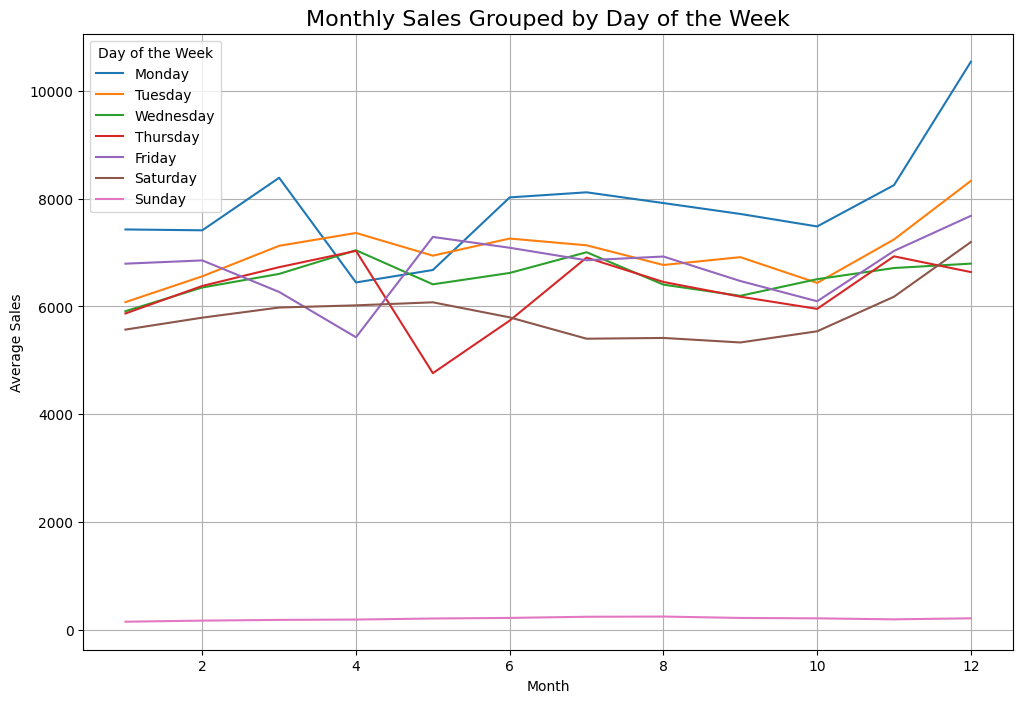

In [15]:
eda.plot_weekly_sales(data)

**Insight**
* Sales trends vary across days, with Monday and Tuesday consistently having the highest average sales throughout the year, peaking sharply in December. Thursday experiences a noticeable dip in mid-year sales (around April and May), but rebounds towards the end of the year. Friday and Saturday show steady performance with moderate increases towards December. Interestingly, Sunday has the lowest sales across all months, indicating minimal activity on this day. This analysis highlights significant weekday variations, suggesting that sales are concentrated on weekdays, particularly early in the week, while weekends, especially Sundays, have lower performance. These patterns could inform operational strategies, such as scheduling promotions or resource allocation, to align with high-demand days.

**Feature Enginering**
1. Yearlt sales pattern is do not change a lot over years: this suggests the possibility to use, when available, yearly seasonality features coming from lag or exogenous variables.

2. Weekly Sales follow the in some how the same pattern across months: this suggests to use weekly features coming from lag or exogenous variables.

## 4. Seasonal Decomposition

**Trend** 
* This component shows the long-term movement in the data. It indicates whether sales are generally increasing, decreasing, or remaining stable over time.

**Seasonal**
* This component captures the repetitive patterns or fluctuations that occur at regular intervals (e.g., monthly, quarterly). It reveals how sales vary throughout the year, highlighting any seasonal effects.

**Residual (or Irregular)** 
* This component represents the random noise or leftover variation after removing the trend and seasonal components. It can indicate anomalies or outliers in the data.
Overall, the results help in understanding the underlying patterns in the sales data, which can inform business decisions and forecasting efforts.

2025-01-05 23:55:57,808 - INFO - Performing seasonal decomposition...


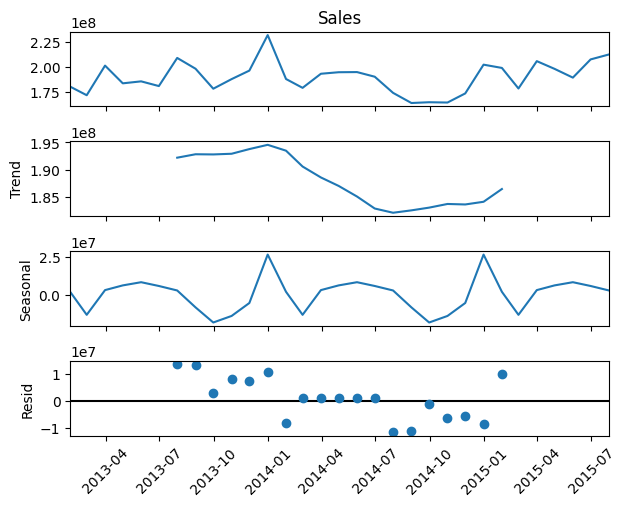

In [16]:
eda.seasonal_decomposition(data)

**ACF Plot:**
* The ACF plot shows how correlated the monthly sales are with their own past values. A significant positive correlation at lag k
k suggests that past values influence current values. 

**PACF Plot:**
* The PACF plot shows the correlation of the series with its lags after removing the effects of intervening lags.
A significant value at lag k
k indicates that the k
k-th lag has a direct influence on the current value, independent of the other lags.

2025-01-05 23:55:58,572 - INFO - Plotting ACF and PACF...


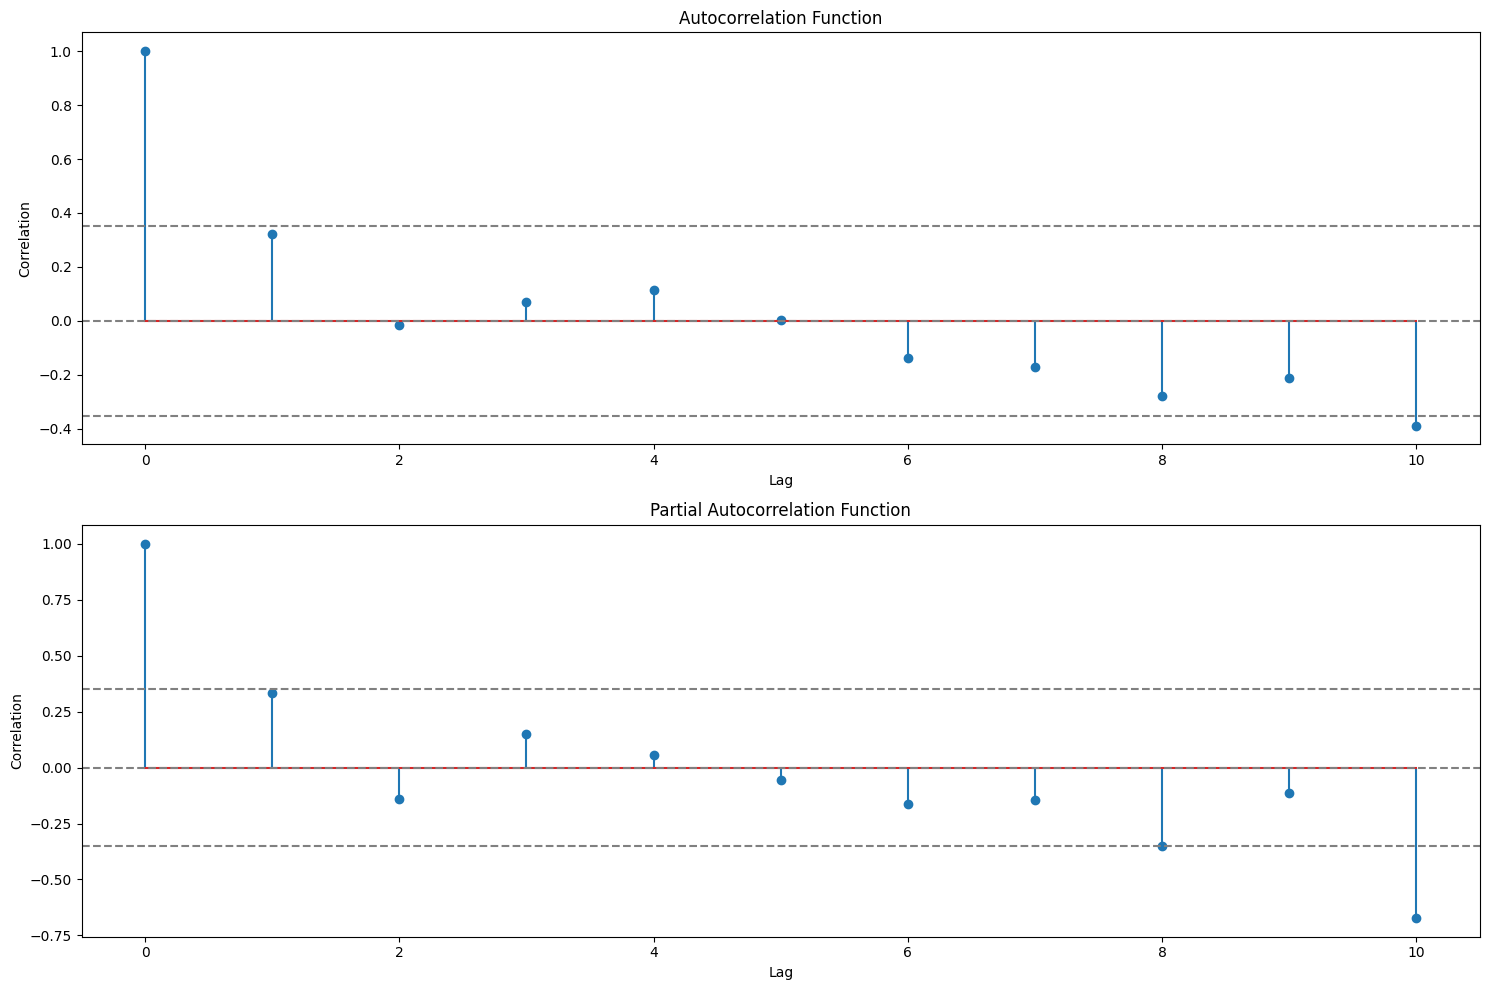

In [17]:
eda.plot_acf_pacf(data)

**Rolling Mean: **
* The rolling(window=12).mean() computes the average sales over a 12-month window. This helps to smooth out short-term fluctuations and highlight longer-term trends.

**Rolling Standard Deviation: **
* The rolling(window=12).std() calculates the standard deviation of sales over the same 12-month window. This provides insight into the variability of sales over time.

2025-01-05 23:55:59,017 - INFO - Plotting rolling statistics...


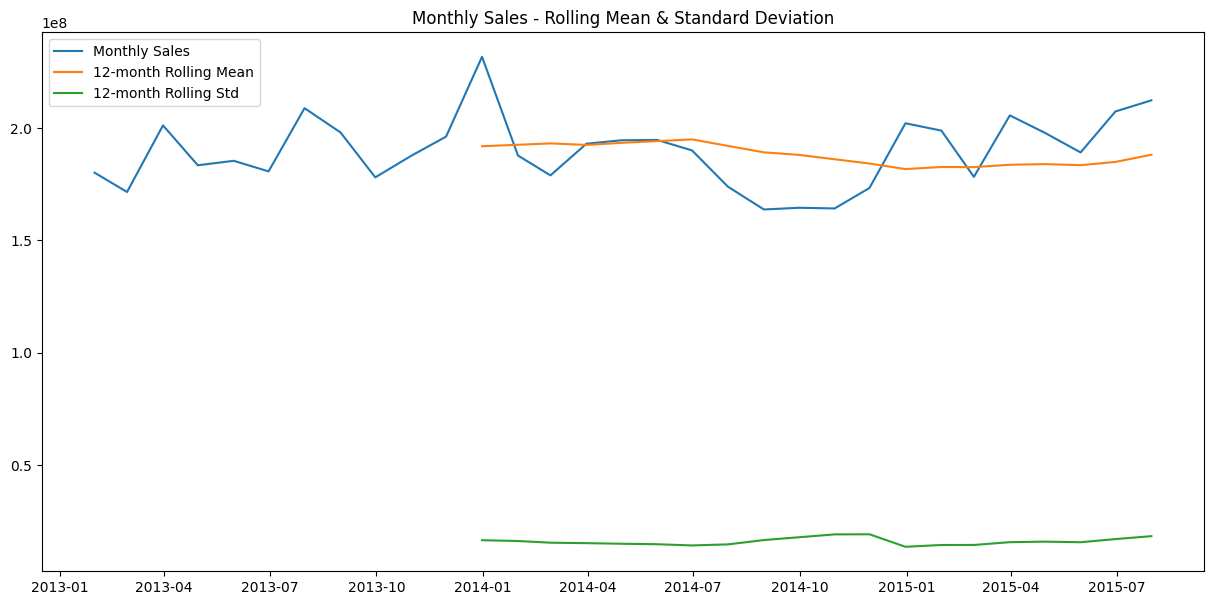

In [18]:
eda.plot_rolling_statistics(data)

## 5. Further Analysis

### Average plot by daya of the week

2025-01-05 23:55:59,364 - INFO - Plotting average sales by day of week...


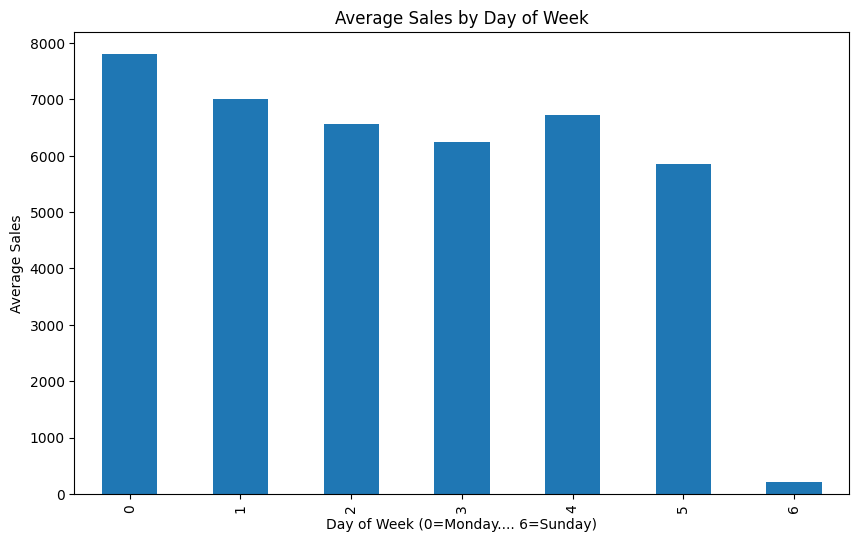

In [19]:
eda.plot_day_of_week_sales(data)

### Average Sales Plot Through The Month

2025-01-05 23:55:59,675 - INFO - Plotting average sales by Month of Year...


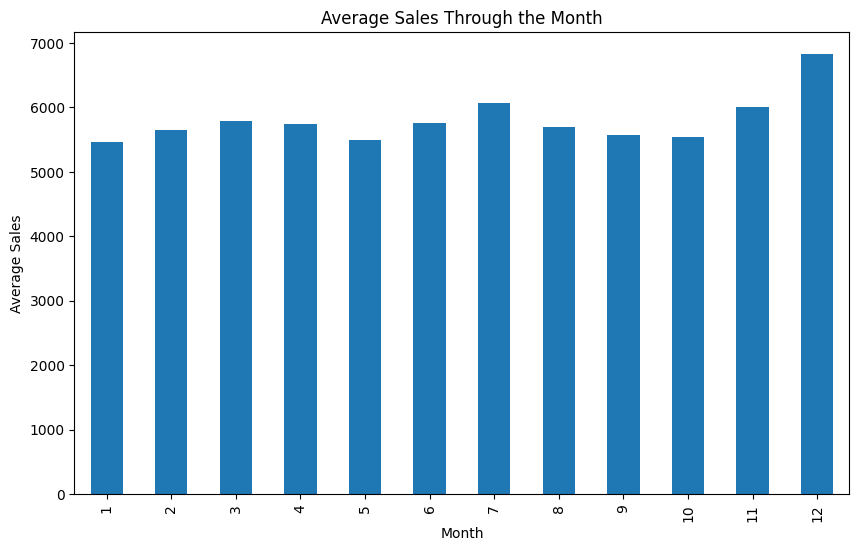

In [20]:
eda.plot_sales_through_month(data)

### Sales Distribution in Holiday and Non-Holiyday

**State Holiday**

2025-01-05 23:55:59,981 - INFO - Plotting sales distribution During StateHoliday.... 


<Figure size 1000x600 with 0 Axes>

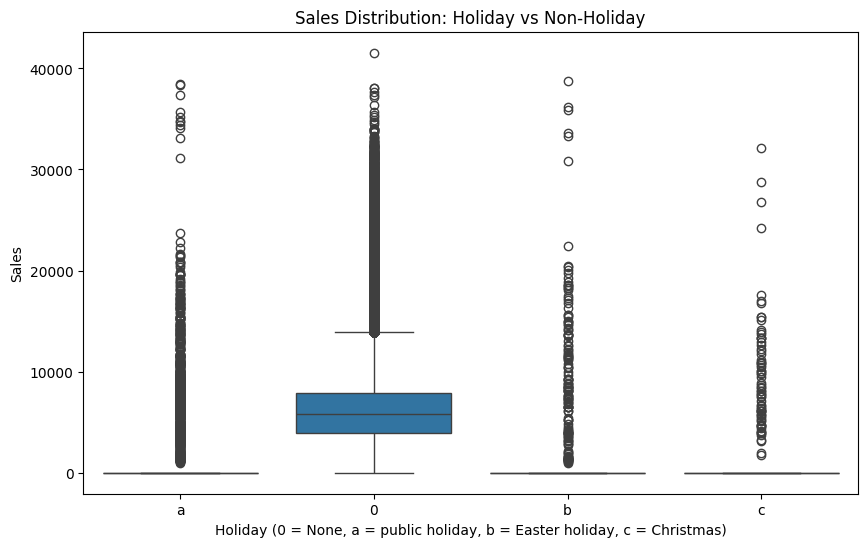

In [21]:
eda.box_plot_stateholiday_sales_distribution(data)

2025-01-05 23:56:01,834 - INFO - Bar Plotting sales distribution During StateHoliday.... 


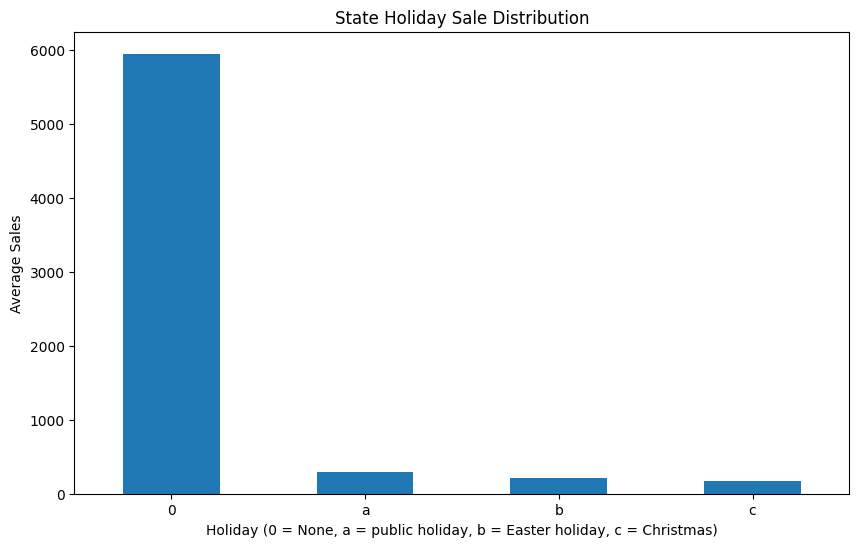

In [22]:
eda.bar_plot_stateholiday_sales_distribution(data)

**State Holiday**

2025-01-05 23:56:02,018 - INFO - Plotting sales distribution During SchoolHoliday.... 
2025-01-05 23:56:02,614 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-05 23:56:03,118 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


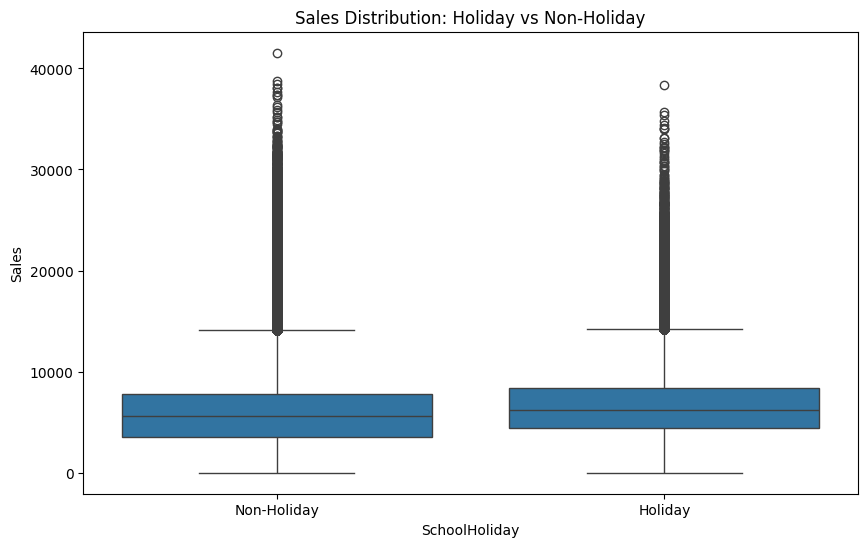

In [23]:
eda.plot_schoolholiday_sales_distribution(data)

### Promotion Effect

2025-01-05 23:56:03,445 - INFO - Plotting promo effect over time...


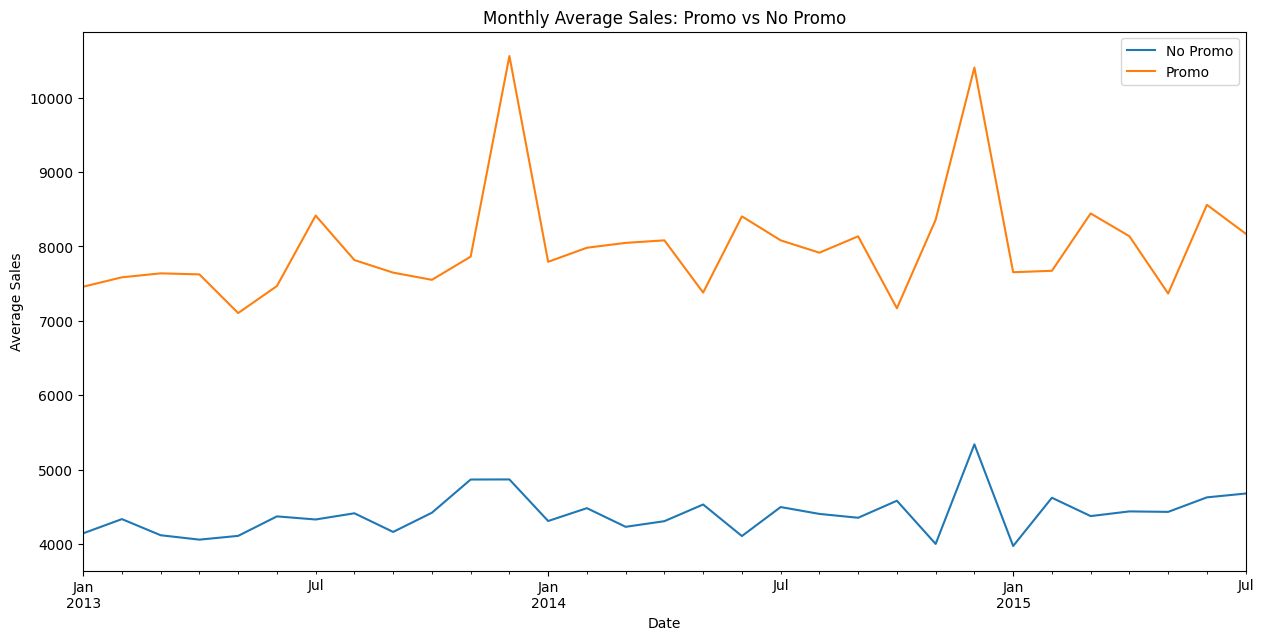

In [24]:
eda.plot_promo_effect(data)

### Store Type Performance

2025-01-05 23:56:03,746 - INFO - Plotting store type performance over time...


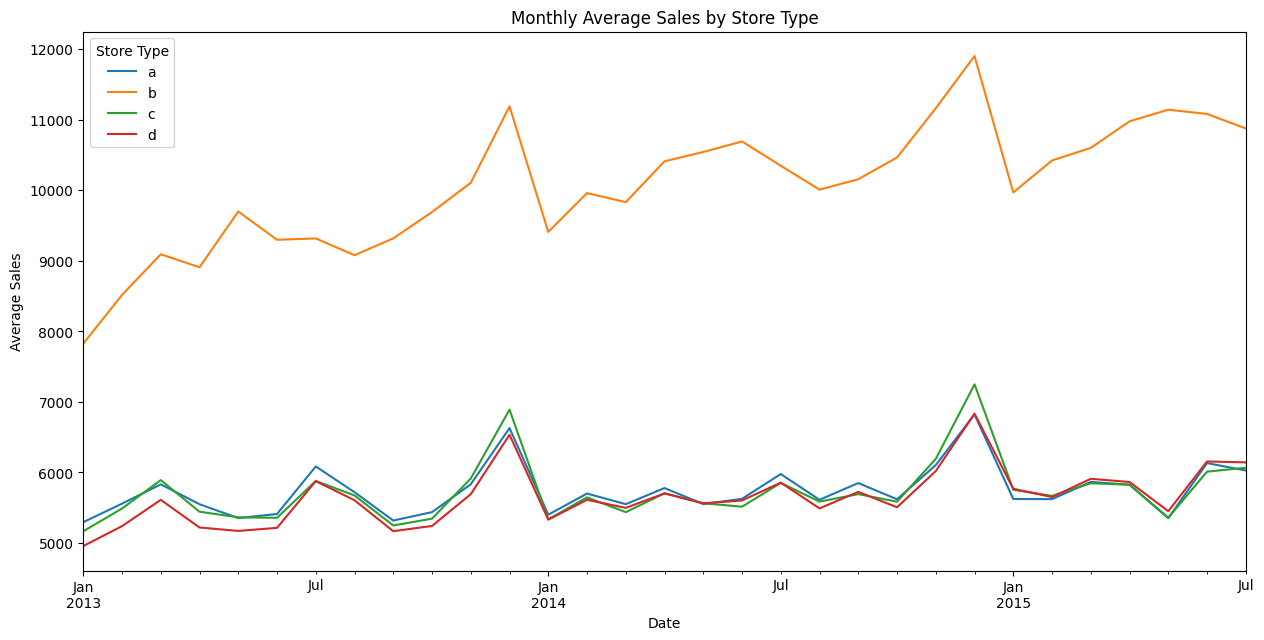

In [25]:
eda.plot_store_type_performance(data)

### Assortment Type performance

2025-01-05 23:56:04,108 - INFO - Plotting Assortment type performance over time...


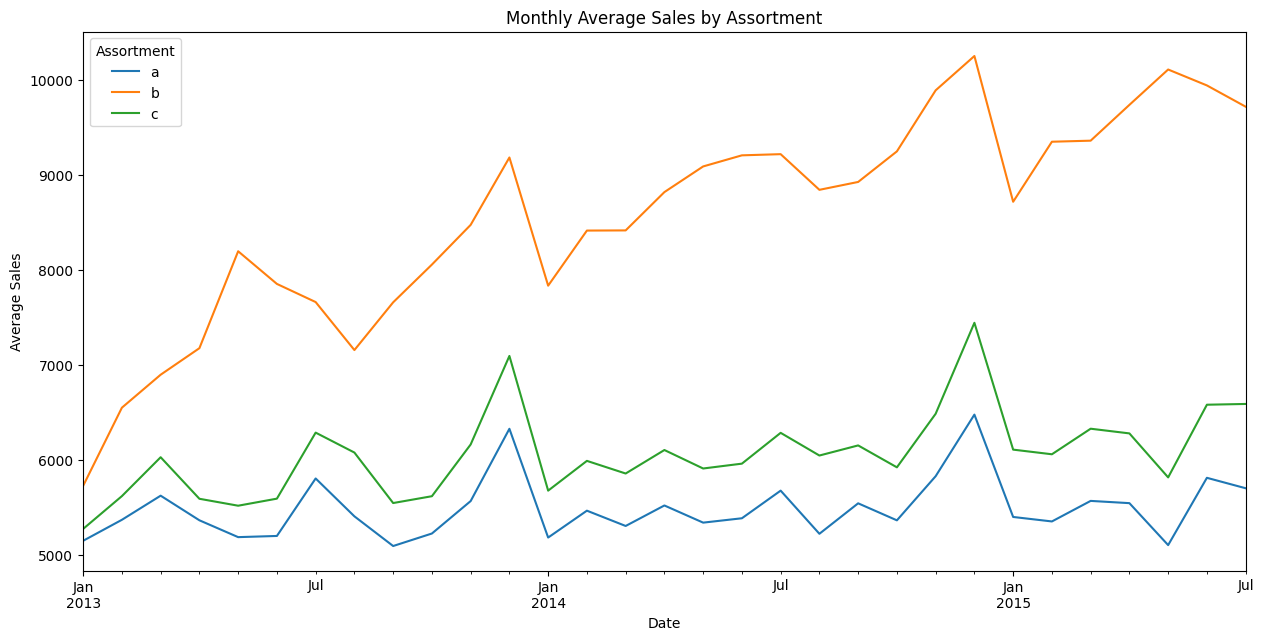

In [26]:
eda.plot_assortment_type_performance(data)

### Customers vs Sales 

2025-01-05 23:56:04,463 - INFO - Plotting sales vs customers scatter plot...


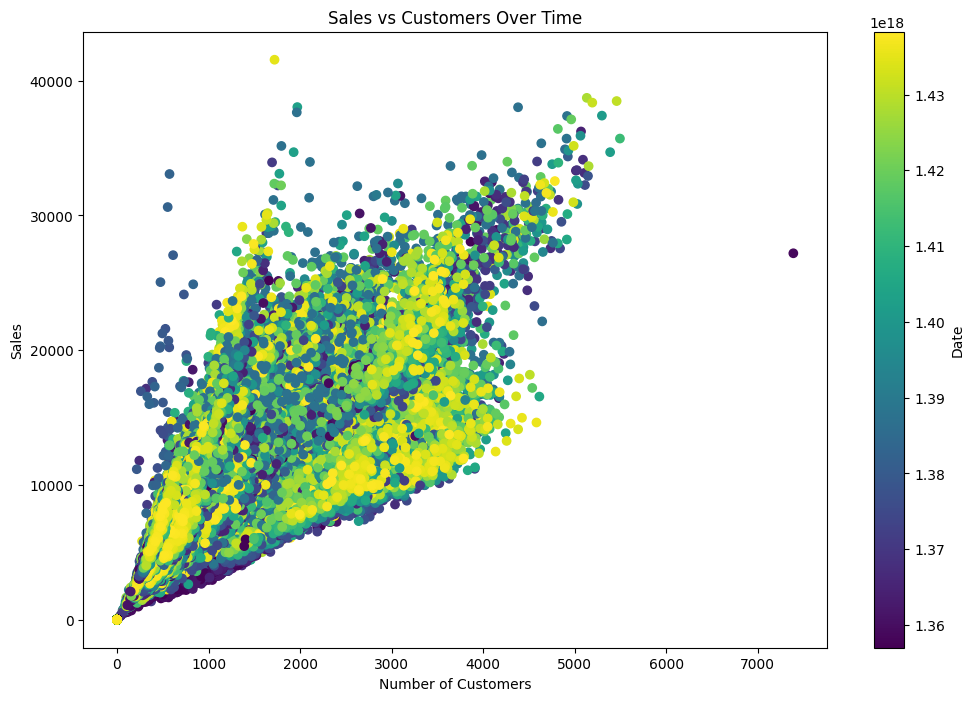

In [27]:
eda.plot_sales_vs_customers(data)